<a href="https://colab.research.google.com/github/IAMDSVSSANGRAL/classication/blob/main/Guided_project_on_Insurance_Decisioning_self_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more.

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

## <b>In this self project, you are required to do </b>

* ### Perform exploratory data analysis
* ### Build logistic regression, random forest, gradient boosted decision trees and xgboost models
* ### Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

## <b>Some of the guidelines for the project :</b>
* ### Describe in detail each of the experiments
* ### Include plots and charts
* ### Draw the final conclusion on the basis of comparison of different models.

# <b><u>Variable Description

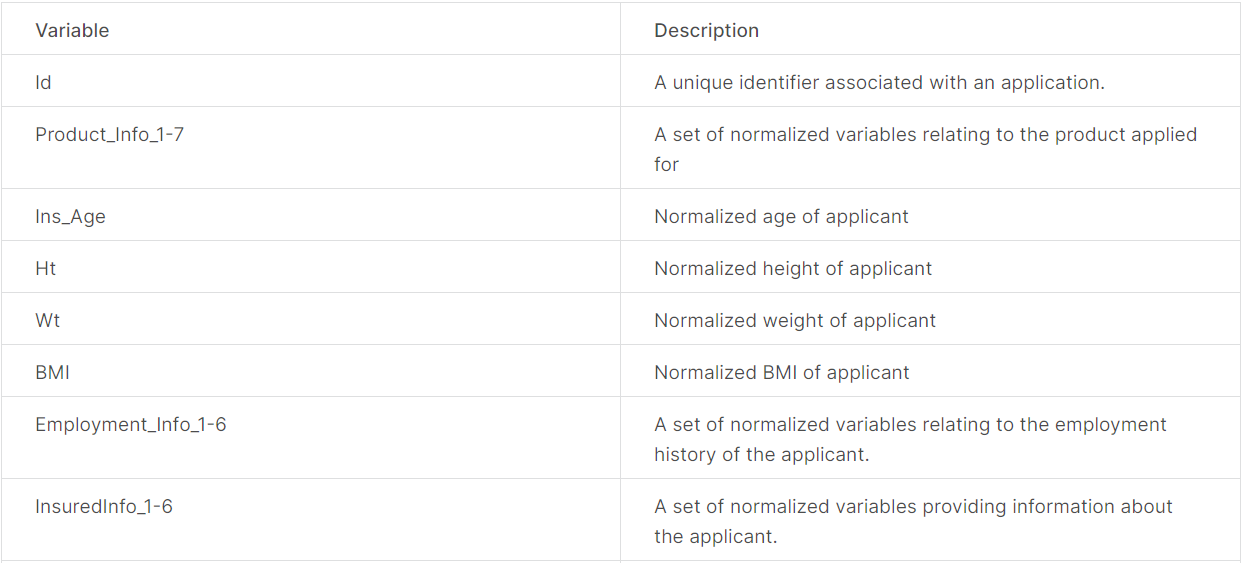

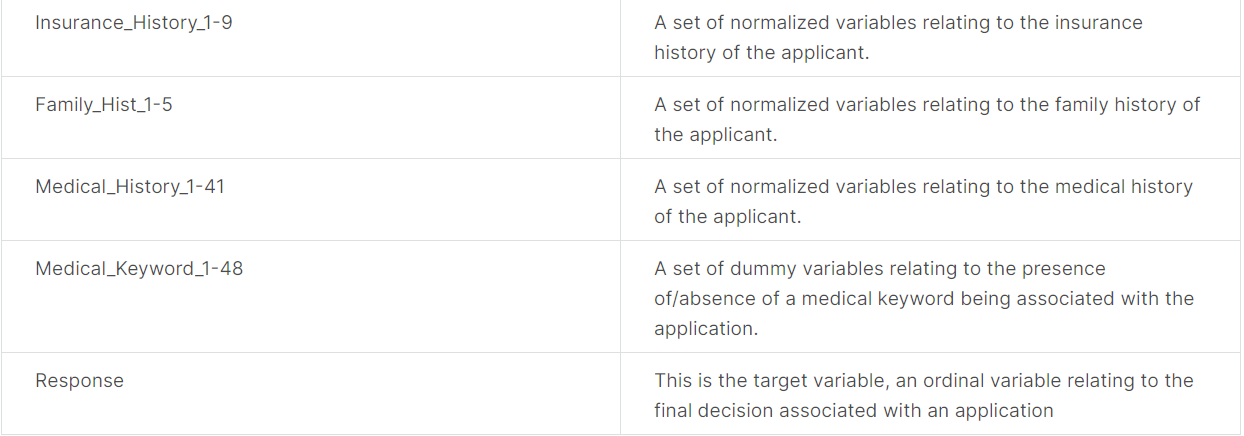

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
path = '/content/drive/MyDrive/Santa/machine learning/classification/Copy of train.csv'

In [9]:
df_raw = pd.read_csv(path, index_col='Id')

In [10]:
data = df_raw.copy()

In [11]:
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


In [12]:
data.shape

(59381, 127)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 58.0+ MB


### Exploring the dependent variable

In [14]:
data['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [15]:
data['Response'].isna().sum()

0

<Axes: xlabel='Response', ylabel='count'>

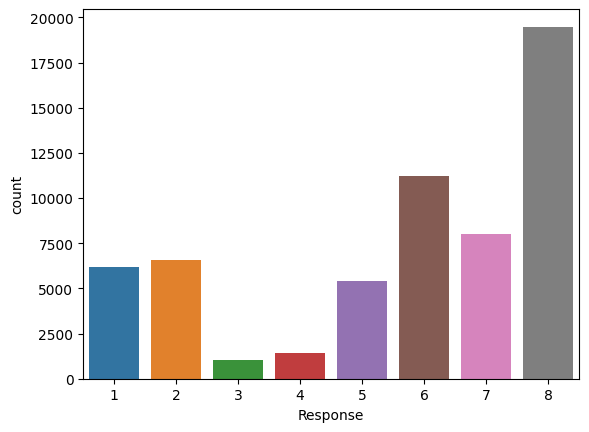

In [16]:
sns.countplot(x = data['Response'])

### Converting the dependent variable to a binary variable (two possible labels/classes)

In [17]:
def modified_response(x):
  if ((x['Response'] <=7) & (x['Response'] >=0) ):
    val = 0
  elif (x['Response']==8):
    val = 1
  else:
    val = -1

  return val

In [18]:
data['Modified_Response'] = data.apply(modified_response,axis = 1)

In [19]:
data.shape

(59381, 128)

In [20]:
data['Modified_Response'].value_counts()

0    39892
1    19489
Name: Modified_Response, dtype: int64

<Axes: xlabel='Modified_Response', ylabel='count'>

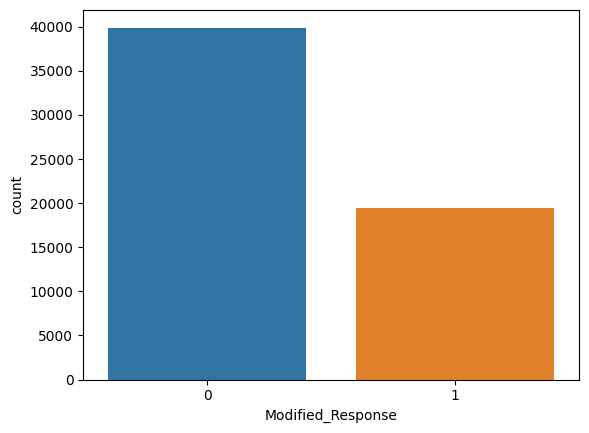

In [21]:
sns.countplot(x= data['Modified_Response'])

In [22]:
data.drop('Response',axis = 1, inplace=True)

In [23]:
data.shape

(59381, 127)

In [24]:
null_values = data.isnull()

In [25]:
for column in null_values.columns:
    if null_values[column].any():
        print(f"Column name: {column}")
        print(f"Number of null values: {null_values[column].sum()}")

Column name: Employment_Info_1
Number of null values: 19
Column name: Employment_Info_4
Number of null values: 6779
Column name: Employment_Info_6
Number of null values: 10854
Column name: Insurance_History_5
Number of null values: 25396
Column name: Family_Hist_2
Number of null values: 28656
Column name: Family_Hist_3
Number of null values: 34241
Column name: Family_Hist_4
Number of null values: 19184
Column name: Family_Hist_5
Number of null values: 41811
Column name: Medical_History_1
Number of null values: 8889
Column name: Medical_History_10
Number of null values: 58824
Column name: Medical_History_15
Number of null values: 44596
Column name: Medical_History_24
Number of null values: 55580
Column name: Medical_History_32
Number of null values: 58274


In [26]:
missing_val_count_by_column = data.isnull().sum()/len(data)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [27]:
data = data.dropna(thresh=data.shape[0]*0.4,axis=1)

In [28]:
data.shape

(59381, 122)

In [29]:
list(data.columns)

['Product_Info_1',
 'Product_Info_2',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_16'

In [30]:
data.describe(include = 'all')

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
count,59381.000000,59381,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
unique,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,14321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.026355,NaN,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,0.328203
std,0.160191,NaN,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,0.469563
min,1.000000,NaN,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [31]:
data['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

In [32]:
data.drop('Product_Info_2',axis=1,inplace=True)

In [33]:
data.shape

(59381, 121)

###model implementation


In [34]:
# Data for all the independent variables
X = data.drop(labels='Modified_Response',axis=1)

# Data for the dependent variable
Y = data['Modified_Response']

In [35]:
X = X.fillna(X.mean())

In [36]:
X.isna().sum()

Product_Info_1        0
Product_Info_3        0
Product_Info_4        0
Product_Info_5        0
Product_Info_6        0
                     ..
Medical_Keyword_44    0
Medical_Keyword_45    0
Medical_Keyword_46    0
Medical_Keyword_47    0
Medical_Keyword_48    0
Length: 120, dtype: int64

In [37]:
missing_val_count_by_column = X.isnull().sum()/len(X)

print(missing_val_count_by_column[missing_val_count_by_column > 0.0].sort_values(ascending=False))

Series([], dtype: float64)


In [38]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [39]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(44535, 120) (44535,)
(14846, 120) (14846,)


###RANDOMFOREST CLASSFIER

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [42]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [43]:
rf_grid.score(X_train,Y_train) #our code

0.8905688666677838

In [44]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=80)

In [45]:
rf_optimal_model = rf_grid.best_estimator_

In [46]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [47]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [48]:
len(train_preds)

44535

In [49]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,train_class_preds)
test_accuracy = accuracy_score(Y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8070281800830807
The accuracy on test dataset is 0.8008891283847501


In [50]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(Y_train,train_class_preds)
test_cm = confusion_matrix(Y_test,test_class_preds )

In [51]:
train_cm

array([[27315,  2592],
       [ 6002,  8626]])

In [52]:
test_cm

array([[9102,  883],
       [2073, 2788]])

In [53]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(Y_train,train_preds)
test_auc = roc_auc_score(Y_test,test_preds)

In [54]:
train_auc

0.8905688666677838

In [55]:
test_auc

0.8835859013782967

In [56]:
rf_optimal_model.feature_importances_

array([1.88185319e-04, 5.06845248e-03, 3.79592492e-02, 1.41279965e-05,
       2.17172607e-04, 2.12059262e-07, 3.51409316e-02, 2.07818599e-02,
       1.83834168e-01, 1.77198759e-01, 2.78325152e-03, 1.33917656e-03,
       8.72834012e-04, 7.04456928e-04, 2.86494257e-03, 2.06272630e-03,
       4.85713416e-03, 9.59238220e-04, 5.88969456e-04, 6.38032918e-04,
       1.23076830e-03, 3.07427944e-02, 3.91980895e-03, 1.71093477e-04,
       1.17703910e-03, 2.22687238e-04, 4.49326983e-04, 2.84979362e-03,
       2.82731314e-04, 2.52573861e-04, 3.37765697e-04, 3.60901476e-03,
       1.15604764e-02, 5.11530841e-03, 2.25381113e-02, 8.83768997e-03,
       2.05831818e-03, 4.81608680e-04, 9.87245286e-02, 1.54405984e-04,
       8.28441576e-03, 1.49654463e-05, 2.82980656e-04, 1.59718378e-04,
       0.00000000e+00, 3.46950844e-05, 3.71792714e-03, 1.34240462e-05,
       4.37847627e-03, 1.27117522e-04, 1.62222562e-04, 4.97629385e-05,
       3.31555261e-04, 1.79910712e-04, 2.70342792e-07, 1.38535441e-01,
      

In [57]:
print(classification_report(Y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      9985
           1       0.76      0.57      0.65      4861

    accuracy                           0.80     14846
   macro avg       0.79      0.74      0.76     14846
weighted avg       0.80      0.80      0.79     14846



In [58]:
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [59]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [60]:
importance_df.head()

,Feature,Feature Importance
0,Product_Info_1,0.00
1,Product_Info_3,0.01
2,Product_Info_4,0.04
3,Product_Info_5,0.00
4,Product_Info_6,0.00


In [61]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
9,BMI,0.18
8,Wt,0.18
55,Medical_History_23,0.14
38,Medical_History_4,0.10
86,Medical_Keyword_15,0.10
...,...,...
44,Medical_History_11,0.00
43,Medical_History_9,0.00
42,Medical_History_8,0.00
41,Medical_History_7,0.00


In [62]:
pip install shap

In [63]:
import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [64]:
#for train data set
X_shap = X_train
explainer = shap.TreeExplainer(rf_optimal_model)
shap_values = explainer.shap_values(X_shap)

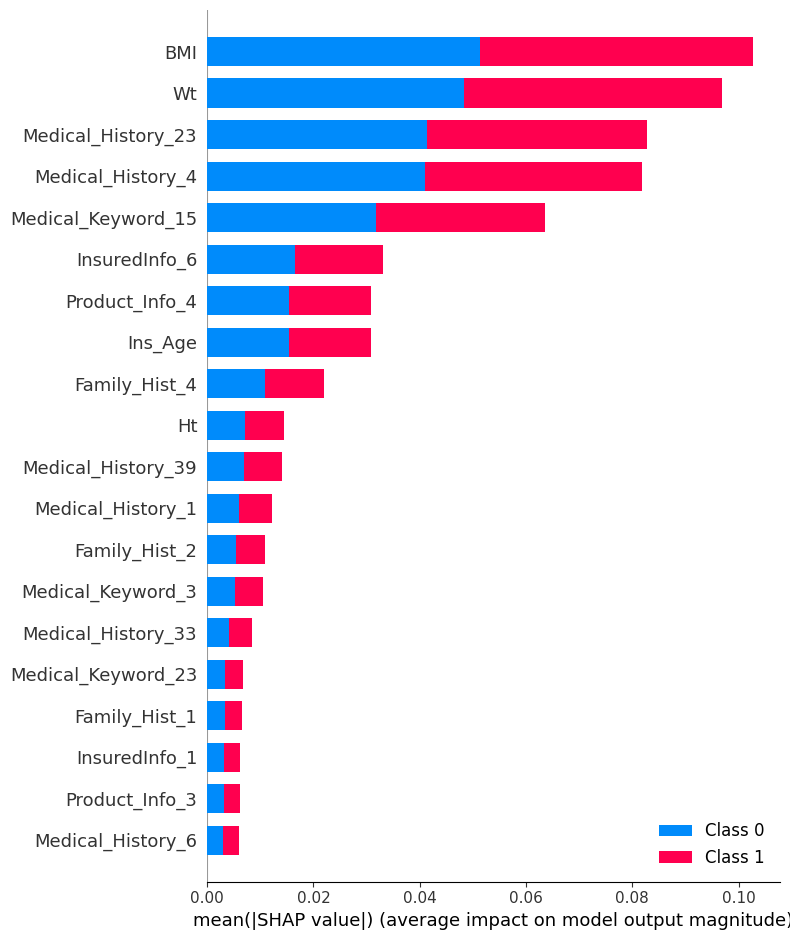

In [65]:
shap.summary_plot(shap_values,X_shap,plot_type  = "bar")

In [66]:
#for testing data
X_shap = X_test
explainer = shap.TreeExplainer(rf_optimal_model)
shap_values = explainer.shap_values(X_shap)

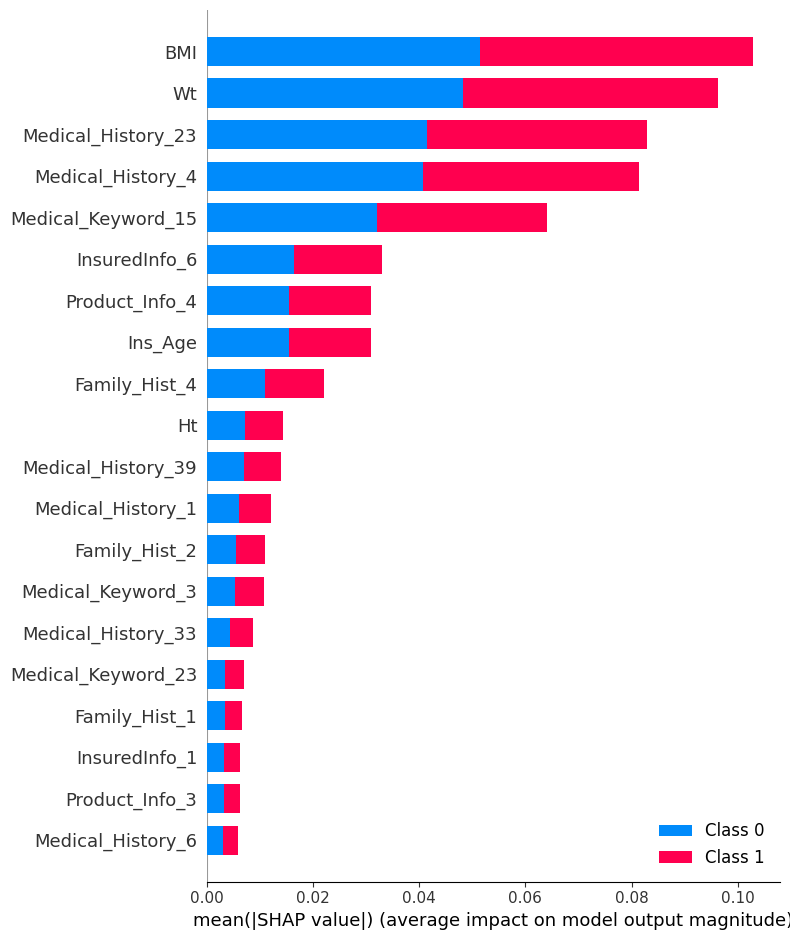

In [67]:
shap.summary_plot(shap_values,X_shap,plot_type  = "bar")

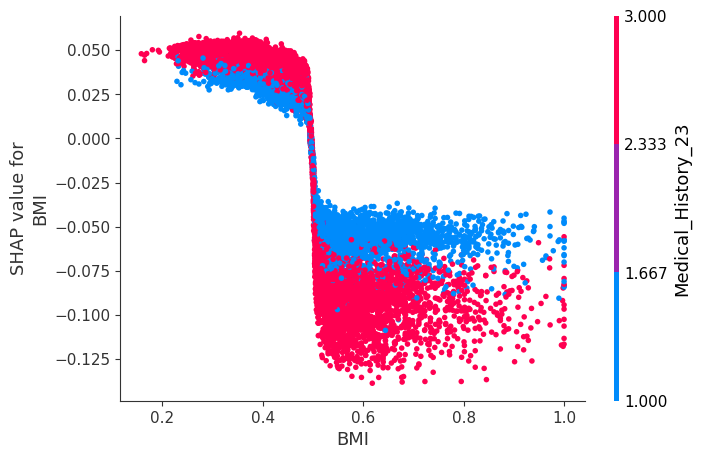

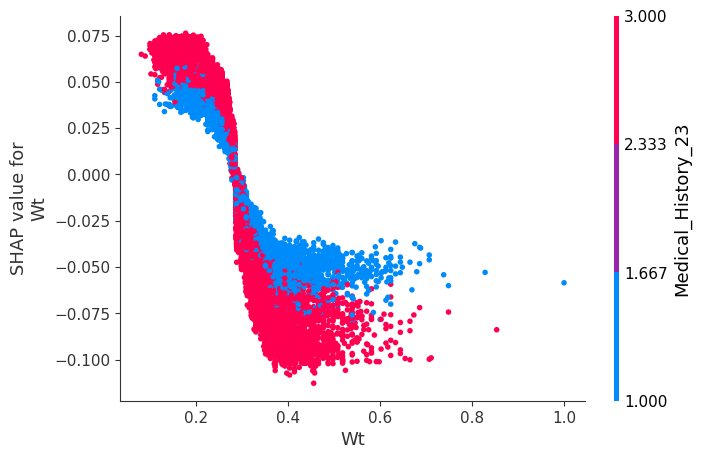

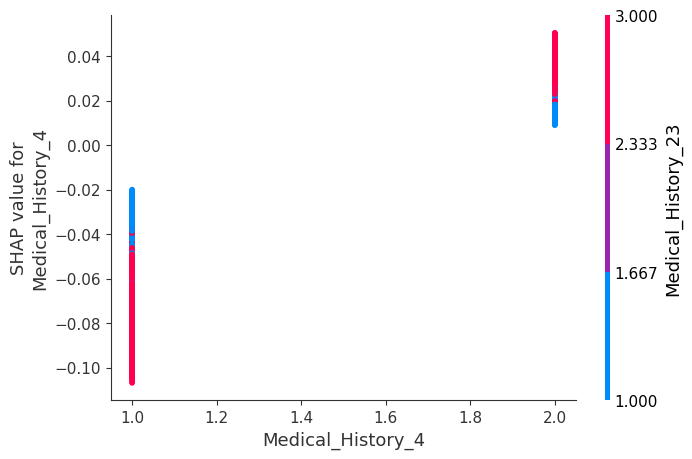

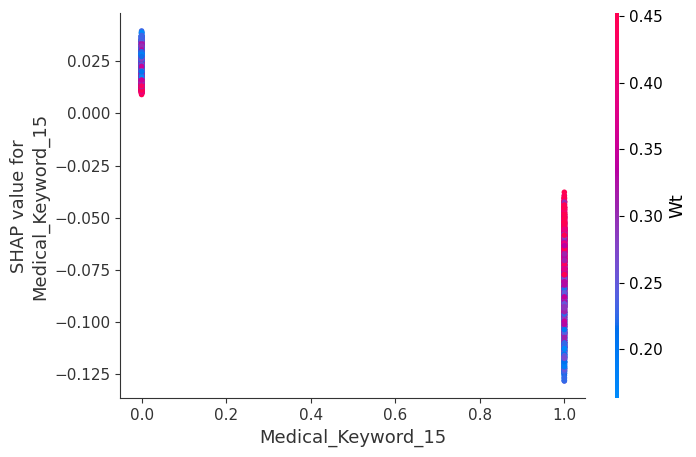

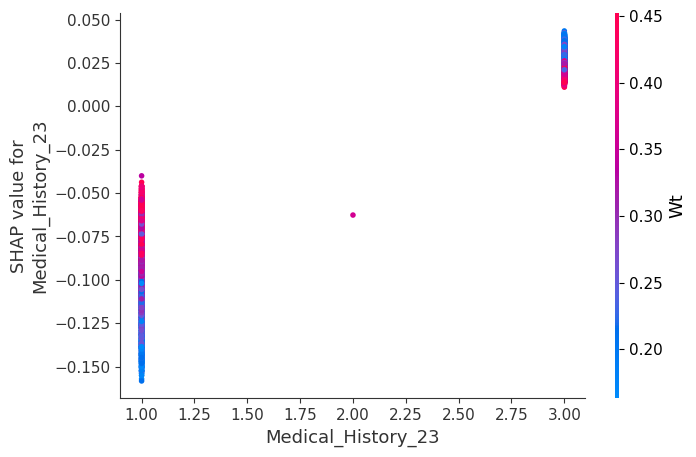

In [68]:
#DEPENDENCE PLOT
top_var  = ['BMI','Wt','Medical_History_4','Medical_Keyword_15','Medical_History_23']
for i in top_var:
  shap.dependence_plot(i,shap_values[1],X_test)

###LOGISTIC CLASSIFIER

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
# HYperparameter Grid
param_dict = {'penalty' : ['l1', 'l2', 'elasticnet'],
              'multi_class' : ['auto','ovr','multinomial'],
              'verbose' : [1,2,3,4,5],
              'solver' : ['‘lbfgs','liblinear','newton-cg']}

In [72]:
# Create an instance of the RandomForestClassifier
logistic_model = LogisticRegression()

# Grid search
log_grid = GridSearchCV(estimator=logistic_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

log_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END multi_class=auto, penalty=l1, solver=‘lbfgs, verbose=1; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=‘lbfgs, verbose=1; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=‘lbfgs, verbose=1; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=‘lbfgs, verbose=1; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=‘lbfgs, verbose=1; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=‘lbfgs, verbose=2; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=‘lbfgs, verbose=2; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=‘lbfgs, verbose=2; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=‘lbfgs, verbose=2; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=‘lbfgs, verbose=2; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=‘lbfgs, verbose=3; total time=   0.0s
[CV] END mult


500 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParamete

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['‘lbfgs', 'liblinear', 'newton-cg'],
                         'verbose': [1, 2, 3, 4, 5]},
             scoring='roc_auc', verbose=2)

In [77]:
log_optimum_model = log_grid.best_estimator_

In [78]:
log_grid.best_params_

{'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear', 'verbose': 1}

In [79]:
log_grid.score(X_train,Y_train) #our code

0.8853034645300348

In [81]:
test_class_pred= log_optimum_model.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report

test_accuracy = accuracy_score(Y_test,test_class_pred)

print("The accuracy on test dataset is", test_accuracy)

The accuracy on test dataset is 0.8104539943419102


In [83]:
test_cm = confusion_matrix(Y_test,test_class_pred)

In [85]:
test_cm

array([[8728, 1257],
       [1557, 3304]])

In [86]:
test_auc = roc_auc_score(Y_test,test_class_pred)

In [87]:
test_auc

0.7769033513240443

In [90]:
print(classification_report(Y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      9985
           1       0.72      0.68      0.70      4861

    accuracy                           0.81     14846
   macro avg       0.79      0.78      0.78     14846
weighted avg       0.81      0.81      0.81     14846

